<h1>Analysis of US Drone Strikes in Yemen, Somalia and Pakistan</h1>
<h3>Evan Traverso, Aaron Kaufman, Spencer Davenport</h3>
<h3>Dronestre.am API created by Josh Begley, http://www.dronestre.am </h3>



<h1>Getting the API</h1>

In [ ]:
import requests
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('evan.a.traverso', 'q4yzzm4whw') #Plotly requires you to sign up and get your own username/API key.

r = requests.get('http://api.dronestre.am/data')
data = r.json()
data

In [2]:
#Create a set of empty lists named after information we are
#interested in from the API output. 
strike_id = []
date = []
country = []
latitude = []
longitude = []
civ_deaths = []
child_deaths = []
total_deaths = []

In [3]:
#This loop reads in info from the API data. The beginning if statement corrects anamolies in the deaths_max column.
strikes = data['strike']
for strike in strikes:
    if strike['deaths_max'] == '?':  #if the deaths_max is equal to a '?', append a 0.
        total_deaths.append(int(0)) #I had to wrap an int() around the value to force it to be an int for some reason.
    elif strike['deaths_max'] == '':
        total_deaths.append(int(0))
    else:
        total_deaths.append(int(strike['deaths_max'])) #here I also had to force it to be an int, or else I could not sum. 

    strike_id.append(strike['_id'])
    date.append(strike['date'])
    country.append(strike['country'])
    latitude.append(strike['lat'])
    longitude.append(strike['lon'])
    civ_deaths.append(strike['civilians'])
    child_deaths.append(strike['children'])

In [4]:
#passing the lists into a dictionary
drones_dict = {'Strike ID': strike_id,
                'Date': date,
                  'Country': country,
                  'Latitude': latitude,
                  'Longitude': longitude,
                  'Civilians Killed': civ_deaths,
                  'Children Killed': child_deaths,
                  'Total Killed': total_deaths}

In [5]:
df_dirty_drone = pd.DataFrame(drones_dict)

<h1>Cleaning the Data</h1>

In [50]:

df_dirty_drone['Year'] = ""
df_dirty_drone['Year'] = df_dirty_drone['Date'].str[0:4]

In [51]:
df_drone = df_dirty_drone[['Strike ID', 'Date', 'Year', 'Country', 'Latitude', 'Longitude', 'Children Killed', 'Civilians Killed', 'Total Killed']]
date = df_drone['Date'].str.split('T').apply(pd.Series).astype(str)
df_drone['Date'] = date

In [10]:
#Cleaning the columns where there are string values.
child_killed = df_drone['Children Killed'].astype(str)
child_killed = child_killed.replace(['Possibly', 'Yes', 'Yes, according to one source.', 'At least 2', 'At least 1', '4-Mar', ''], 
                                  ['0', '1', '1', '2', '1', '4', '0'])
#using regex to clean hyphenated values
child_new = []
for child in child_killed:
    child_new.append(re.sub(r'.*-', '', child))

child_killed = pd.Series(child_new)
df_drone['Children Killed'] = child_killed.astype(int)

In [11]:
#same thing as above, but for civilians instead of children
civ_killed = df_drone['Civilians Killed'].astype(str)
civ_killed = civ_killed.replace(['Unknown', 'Possible', 'Possibly', '', 'At least 1', "'Many' (2 named)", "Some'"], 
                                ['0', '0', '0', '0', '1', '2', '3'])
civ_new = []
for civ in civ_killed:
    civ_new.append(re.sub(r'.*-', '', civ))
    
civ_killed = pd.Series(civ_new)

df_drone['Civilians Killed'] = civ_killed.astype(int)
df_drone

,Strike ID,Date,Year,Country,Latitude,Longitude,Children Killed,Civilians Killed,Total Killed
0,55c79e711cbee48856a30886,2002-11-03,2002,Yemen,15.47467,45.322755,0,0,6
1,55c79e711cbee48856a30887,2004-06-17,2004,Pakistan,32.30512565,69.57624435,2,2,8
2,55c79e711cbee48856a30888,2005-05-08,2005,Pakistan,32.98677989,70.26082993,0,0,2
3,55c79e721cbee48856a30889,2005-11-05,2005,Pakistan,32.99988191,70.34082413,3,8,8
4,55c79e721cbee48856a3088a,2005-12-01,2005,Pakistan,33.00866349,70.04196167,2,2,5
5,55c79e721cbee48856a3088b,2006-01-06,2006,Pakistan,33.09499311,70.05912781,1,4,8
6,55c79e721cbee48856a3088c,2006-01-13,2006,Pakistan,34.81549453,71.4969635,5,18,22
7,55c79e721cbee48856a3088d,2006-10-30,2006,Pakistan,34.83634999,71.49215698,69,82,83
8,55c79e721cbee48856a3088e,2007-01-16,2007,Pakistan,32.83575063,69.55581665,1,8,8
9,55c79e721cbee48856a3088f,2007-04-27,2007,Pakistan,33.09499311,70.05912781,0,4,4


<h1>Analysis</h1>

In [12]:
#Total number killed by US drone strikes up to this point
sum(df_drone['Total Killed'])

5240

In [13]:
#Dataframe showing the total number killed by US drone strikes in Pakistan, Yemen, Somalia and the Afghan border. Sorted by highest.
by_country = df_drone.groupby('Country')
total_deaths_by_country = by_country['Total Killed'].sum()
pd.DataFrame(total_deaths_by_country.sort_values(ascending=False))

,Total Killed
Country,
Pakistan,3982
Yemen,1145
Somalia,106
Pakistan-Afghanistan Border,7


In [14]:
sum(df_drone['Civilians Killed'])

1093

In [15]:
#Dataframe showing the total number killed by US drone strikes in Pakistan, Yemen, Somalia and the Afghan border. Sorted by highest.
by_country = df_drone.groupby('Country')
civ_deaths_by_country = by_country['Civilians Killed'].sum()
pd.DataFrame(civ_deaths_by_country.sort_values(ascending=False))

,Civilians Killed
Country,
Pakistan,931
Yemen,143
Somalia,19
Pakistan-Afghanistan Border,0


In [16]:
sum(df_drone['Children Killed'])

205

In [18]:
#Dataframe showing the total number killed by US drone strikes in Pakistan, Yemen, Somalia and the Afghan border. Sorted by highest.
by_country = df_drone.groupby('Country')
child_deaths_by_country = by_country['Children Killed'].sum()
pd.DataFrame(child_deaths_by_country.sort_values(ascending=False))

,Children Killed
Country,
Pakistan,183
Yemen,22
Somalia,0
Pakistan-Afghanistan Border,0


In [41]:
#showing the total amount of people killed for each year. 2010 is the highest.
by_year = df_drone.groupby('Year')
deaths_by_year = by_year['Total Killed'].sum()
df_deaths = pd.DataFrame(deaths_by_year.sort_values(ascending=False))
df_deaths

,Total Killed
Year,
2010,1066
2012,982
2011,848
2009,743
2008,398
2013,371
2014,364
2015,239
2006,113


In [42]:
#showing the total amount of people killed for each year. 2010 is the highest.
by_year = df_drone.groupby('Year')
civ_deaths_by_year = by_year['Civilians Killed'].sum()
df_civ = pd.DataFrame(civ_deaths_by_year.sort_values(ascending=False))
df_civ


,Civilians Killed
Year,
2011,218
2010,210
2009,192
2008,162
2006,104
2012,94
2007,46
2013,34
2015,12


In [24]:
#showing the total amount of people killed for each year. 2010 is the highest.
by_year = df_drone.groupby('Year')
child_deaths_by_year = by_year['Children Killed'].sum()
pd.DataFrame(child_deaths_by_year.sort_values(ascending=False))


,Children Killed
Year,
2006,75
2009,39
2008,34
2010,16
2011,11
2012,10
2014,5
2013,5
2005,5


In [44]:
by_country = df_drone.groupby(['Country', 'Year'])
total_per_country_year = by_country['Total Killed'].sum()
pd.DataFrame(total_per_country_year)

Total Killed
Country                     Year              
Pakistan                    2004             8
                            2005            15
                            2006           113
                            2007            56
                            2008           398
                            2009           743
                            2010          1066
                            2011           685
                            2012           420
                            2013           203
                            2014           187
                            2015            78
                            2016            10
Pakistan-Afghanistan Border 2013             7
Somalia                     2011            19
                            2012             8
                            2013             2
                            2014            20
                            2015            57
Yemen                       2002             6
                            2011           144
                            2012           554
                            2013           159
                            2014           157
                            2015           104
                            2016            21

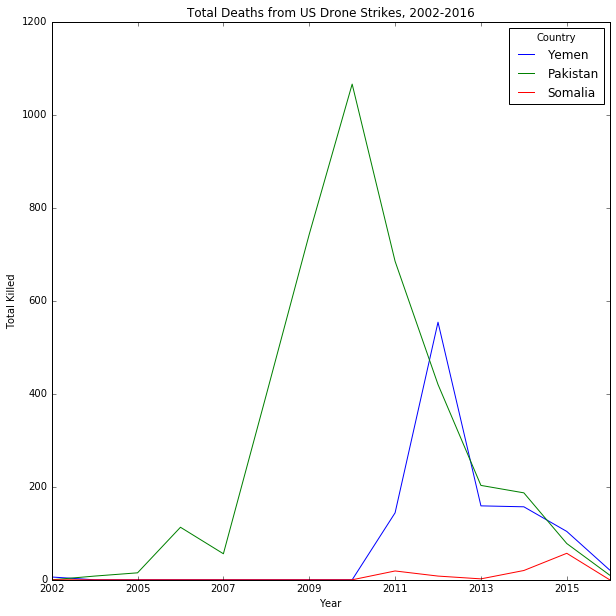

In [25]:
deaths_per_year = df_drone.groupby(['Year', 'Country'])
deaths_per_year_count = deaths_per_year['Total Killed'].sum()
deaths_per_year = deaths_per_year_count.unstack('Country')
deaths_per_year.fillna(0, inplace=True)
deaths_per_year
deaths_per_year[['Yemen', 'Pakistan', 'Somalia']].plot(figsize=(10,10))
plt.ylabel('Total Killed')
plt.title('Total Deaths from US Drone Strikes, 2002-2016')

In [49]:
civilian_death_rate = (civ_deaths_by_year/deaths_by_year * 100)
pd.DataFrame({'Percentage':civilian_death_rate})

,Percentage
Year,
2002,0.000000
2004,25.000000
2005,66.666667
2006,92.035398
2007,82.142857
2008,40.703518
2009,25.841184
2010,19.699812
2011,25.707547


<h1>Graphs Using Plotly Module</h1>
<h3>Requires a free plotly account</h3>

In [ ]:
data = Data([
    Choropleth(
        z=[7, 106, 1141, 3982, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        autocolorscale=False,
        colorscale=[[0, 'rgb(100, 200, 300)'], [1, 'rgb(250, 30, 30)']],
        locationmode='country names',
        locations = ['Afghanistan', 'Somalia', 'Yemen', 'Pakistan', 'Oman', 'India', 'Ethiopia', 'Kenya', 'Saudi Arabia', 
                     'Iran', 'China', 'Tajikistan','Turkmenistan', 'Uzbekistan', 'Djibouti'],
        zmax=4000,
        zmin=0
            )])

layout = Layout(
    autosize=True,
    height=700,
    title='US Drone Deaths Per Country',
    width=1600
                )
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [48]:
total = Bar(
    x = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
    y = ['6', '0', '8', '15', '113', '56', '398', '743', '1066', '848', '982', '371', '364', '239','31'],
    name='Total Killed',
              )
civilians = Bar(
    x = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
    y = ['0', '0', '2', '5', '104', '1', '34', '39', '16', '11', '10', '5', '5', '2', '0'],
    marker = Marker(
        color='rgb(7, 55, 99)'
                ),
    name= 'Civilans Killed',
            )
data = Data([civilians, total])
layout = Layout(
    autosize=False,
    barmode='stack',
    height=800,
    title='US Drone Strike Deaths',
    width=1200,
    xaxis=XAxis(
        autorange=True,
        range=[2002, 2016],
        type='linear'
    ),
    yaxis=YAxis(
        autorange=True,
        range=[0, 1100],
        type='linear'
    )
)
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

u'https://plot.ly/~evan.a.traverso/10'

In [ ]:
Afghanistan = Bar(
    x = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
    y = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '7', '0', '0', '0'],
    name='Afghanistan/Pakistan Border')

Pakistan = Bar(
    x = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
    y = ['0', '0', '8', '15', '113', '56', '398', '743', '1066', '685', '420', '203', '187', '78', '10'],
    name='Pakistan')

Somalia = Bar(
    x = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
    y = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '19', '8', '2', '20', '57', '6'],
    name='Somalia')

Yemen = Bar(
    x = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
    y = ['6', '0', '0', '0', '0', '0', '0', '0', '0', '144', '554', '159', '157', '104', '21'],
    name='Yemen')
   
data = Data([Pakistan, Yemen, Somalia, Afghanistan])
layout = Layout(
    autosize=True,
    barmode='stack',
    height=475,
    title='US Drone Strikes by Country',
    width=1019,
    xaxis=XAxis(
        autorange=False,
        range=[2001.5, 2016.5],
        title='2002 to 2016',
        type='linear'),
    yaxis=YAxis(
        autorange=False,
        range=[0, 1000],
        type='linear'))

fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)